# TEST CASES 

In [2]:
'''
INC group 
Alhasan Al-Azzawi
Eszter Peterfay
Grace Bediako
Mathews Asare
'''
*** Settings ***
Library   String
Library   Collections
Library   OperatingSystem
Library   SeleniumLibrary

## MANDATORY TESTS

In [3]:
*** Keywords ***
Open webapp
    Open browser   https://vaalikone.yle.fi/eduskuntavaali2019?lang=en-US
    Maximize browser window
    #Check if the welcome text is visible
    Wait Until Element Is Visible   xpath:/html/body/div/main/div[1]/section/h1

Open webapp in the browser and select municipality
    Open webapp
    Click element   xpath:/html/body/div/main/div[1]/section/div[2]/input
    Input text   xpath:/html/body/div/main/div[1]/section/div[2]/input   Hä
    Page should contain   Hämeenlinna
    Click element   xpath:/html/body/div/main/div[1]/section/div[2]/div/a[2]
    Click button   xpath:/html/body/div/main/div[1]/section/button

Open webapp and browse candidates
    Open webapp
    Click element   xpath:/html/body/div/main/div[1]/section/a

Test if the elements are at the same horizontal position
    [Arguments]   ${count}   ${INDEX}
    FOR   ${i}   IN RANGE   1   ${count}+1
        #Loop through on elements in the current topic and check the horizontal position of the question number 
        ${horizontalPosition2}=   Get horizontal position   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[${i}]/div/div[1]
        #Compare the horizontal position of the current element to the horisontal position of the first element
        Run keyword and continue on failure   Should be equal   ${horizontalPosition}   ${horizontalPosition2}
    END
    
Check if the font and color is matching in questions
    [Arguments]   ${count}   ${INDEX}
    FOR   ${i}   IN RANGE   1   ${count}+1
        ${current_question}=   Get webelement   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[${i}]/div/div[2]    
        ${color2}=   Call method   ${current_question}   value_of_css_property   color
        ${font2}=   Call method   ${current_question}   value_of_css_property   font-family
        Should be equal   ${color}   ${color2}
        Should be equal   ${font}   ${font2}
    END

Select answers
    [Arguments]   ${count}   ${INDEX}
    FOR   ${i}   IN RANGE   ${count}
        #Use the counter initialized in the test case to access the correct value from list
        ${value}=   set variable   ${answers}[${counter}]
        Click element   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[${i}+1]/div/div[3]/div[${value}]/input
        #After the current value has been inputted, the counter is increased by one and the previous value will be overwritten so next time the keyword will be called the new value will be used 
        ${counter}=   Evaluate   ${counter}+1
        Set global variable   ${counter}
    END

Box(children=(Button(description='Open webapp', style=ButtonStyle()),), layout=Layout(display='flex', flex_flo…

Output()

Box(children=(Button(description='Open webapp in the browser and select municipality', style=ButtonStyle()),),…

Output()

Box(children=(Button(description='Open webapp and browse candidates', style=ButtonStyle()),), layout=Layout(di…

Output()

Box(children=(Button(description='Test if the elements are at the same horizontal position', style=ButtonStyle…

Output()

Box(children=(Button(description='Check if the font and color is matching in questions', style=ButtonStyle()),…

Output()

Box(children=(Button(description='Select answers', style=ButtonStyle()), Label(value='count='), Text(value='')…

Output()

### Mandatory test 1

In [ ]:
*** Test Cases ***
Check that question number elements are at the same distance from the left edge of the screen
    #Use predefined keyword
    Open webapp in the browser and select municipality
 
    #Get how many different topic can be found on the page 
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[*]
    
    Wait until element is visible   xpath:/html/body/div/main/div[1]/div/article[1]/section[1]/h2
    
    #Get the horizontal position of the first number - this will be the base for further comparisons
    ${horizontalPosition}=   Get horizontal position   xpath:/html/body/div/main/div[1]/div/article[1]/section[1]/div/div[1]

    Set global variable   ${horizontalPosition}
    
    #In this for loop we iterating through on the different topics, which consist of multiple questions each
    FOR   ${INDEX}   IN RANGE   1   ${count}+1
        #Count how many questions belong to the current topic
        ${count2}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[*]/div/div[1]
        
        #Use keyword to loop through on the questions in the current topic - count2 will be used to determine the range of the loop, the INDEX will be used to identify the webelements
        Test if the elements are at the same horizontal position   ${count2}   ${INDEX}
    END

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

: 

### Mandatory test 2

In [10]:
*** Test Cases ***
Check if the color and the font is the same for all questions
    #Get the first question element 
    ${question1}=   Get webelement   xpath:/html/body/div/main/div[1]/div/article[1]/section[1]/div/div[2]
    
    #Get the color of the first question - and make it available for other cells
    ${color}=   Call method   ${question1}   value_of_css_property   color
    set global variable   ${color}
    
    #Get the font of the first question - and make it available for other cells
    ${font}=   Call method   ${question1}   value_of_css_property   font-family
    set global variable   ${font}
    
    #Count the articles - same as in previous test case
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[*]
    
    #Following the same logic as in previous test case we iterate through the questions by topics
    FOR   ${INDEX}   IN RANGE   1   ${count}+1
        ${count2}=   Get element count    xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[*]/div/div[2]
       
        #Use predefined keyword to make the comparisions
        Check if the font and color is matching in questions   ${count2}   ${INDEX}
    END

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

### Mandatory test 3

In [23]:
*** Test Cases ***
Answer all questions and proceed to show the results
    Open webapp in the browser and select municipality
    #This number will indicate which is the current value to be used for answering
    ${counter}=   set variable   0
    Set global variable   ${counter}
    
    #For relative path it's enough if only the filename is defined
    ${path}=   set variable   valinnat.txt
    
    #Read the content of valinnat.txt
    ${answers}=   Get file   ${path}
    
    #Split the numbers by rows - and get those in a list
    @{answers}=   Split string   ${answers}  \n
    Set global variable   @{answers}
    
    #Count again the topics
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[*]
    
    #Loop through the topics
    FOR   ${INDEX}  IN RANGE   ${count}+1
        ${count2}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/section[*]/div/div[1]
        #Use predefined keyword
        Select answers   ${count2}   ${INDEX} 
    END
    Click element   xpath:/html/body/div/main/div[1]/div/button

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

### Mandatory test 4

In [ ]:
*** Test Cases ***
Check if the name is correctly given in all page for candidates in the result
    #This testcase requires to run the Mandatory test 3 first to get to see the page being tested
    Page should contain   Candidates
    #Get how many candidates can be found on the page where the result can be seen
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/section[*]/div[1]/div[1]/a[2]
    
    #Loop through the candidates
    FOR   ${INDEX}   IN RANGE   1   ${count}+1
        #Get the name of the current candidates
        ${name}=   Get text   xpath:/html/body/div/main/div[1]/div/section[${INDEX}]/div[1]/div[1]/h3/a
        
        #Go to the details of the current candidate
        Page should contain   Meet the candidate
        Click element   xpath:/html/body/div/main/div[1]/div/section[${INDEX}]/div[1]/div[1]/a[2]
        
        #Get the name can be found on the profile of the candidate
        Wait Until Element Is Visible   xpath:/html/body/div/main/div[1]/div/section[1]/div[1]/div[1]/h1
        ${name2}=   Get text   xpath:/html/body/div/main/div[1]/div/section[1]/div[1]/div[1]/h1
       
        #Compare the names can be found on different pages
        Run keyword and continue on failure   Should be equal   ${name}   ${name2}
        
        #Go back to previous page (where the matching candidates are listed)
        Click element   xpath:/html/body/div/main/div[1]/header/div[1]/button/img
    END

### Mandatory test 5

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

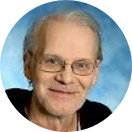

In [12]:
*** Test Cases ***
Browse candidates and check if the images are matching
    #Use predefined keyword to get to the page where all the candidates can be browsed
    Open webapp and browse candidates
    
    #Name of the directory where the screenshow from the browser will be stored
    ${directory}=   set variable   original_image/
    
    #Name of the directory where the downloaded image will be stored
    ${directory2}=   set variable   downloaded_image/
    
    #Name of the directory where the image indicating the differences will be stored
    ${directory3}=   set variable   result/
    
    #Wait until the search bar is visible on the page
    Wait until element is visible   xpath:/html/body/div/main/div[1]/div/div[1]/input
    Input text   xpath:/html/body/div/main/div[1]/div/div[1]/input   Harri Aalto
    
    #Click on the name of the candidate
    Click element   xpath:/html/body/div/main/div[1]/div/div[3]/div[1]/div/div/div/section/div/div[1]/h3/a
    
    #Create the directory if not exists
    Create directory   ${directory}
    Set screenshot directory   ${directory}
    Empty directory   ${directory}
    
    #Capture the screenshot in the created directory
    Wait until element is visible   xpath:/html/body/div/main/div[1]/div/section[1]/img
    Capture element screenshot    xpath:/html/body/div/main/div[1]/div/section[1]/img
    
    #Get the difference value
    ${diffvalue}=   Run and return rc and output   magick ${directory}selenium-element-screenshot-1.png ${directory2}selenium-element-screenshot-1.png -metric RMSE -compare -format "%[distortion]" info:
    ${diffvalue}=   Set variable   ${diffvalue}[1]
    
    #If there's a difference, create a difference.png file where the differences are highlighted
    Create directory   ${directory3}
    Run keyword if   ${diffvalue}>0   run   magick ${directory}selenium-element-screenshot-1.png ${directory2}selenium-element-screenshot-1.png -metric RMSE -compare ${directory3}difference.png

## REMAINING TEST CASES

In [17]:
*** Keywords ***
Increase index
    #This keyword is used in Test 7 
    [Arguments]   ${INDEX}
    ${INDEX}=   Evaluate   ${INDEX}+1
    Log   index was increased
    set global variable   ${INDEX}

Box(children=(Button(description='Increase index', style=ButtonStyle()), Label(value='INDEX='), Text(value='')…

Output()

### Test 6

In [ ]:
*** Test Cases ***
Test if there are pictures for all topics on the form
    #Use prdefined keyword (from second cell) to get to the form
    Open webapp in the browser and select municipality
    
    #Count how many topics can be found on the form
    ${numOfTopics}=   Get element count   xpath:/html/body/div/main/div[1]/div/article[*]
    
    #Count how many images can be found on the form
    ${numOfPictures}=  Get element count   xpath:/html/body/div/main/div[1]/div/article[*]/img
    Should be equal   ${numOfTopics}   ${numOfPictures}

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

: 

### Test 7

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

: 

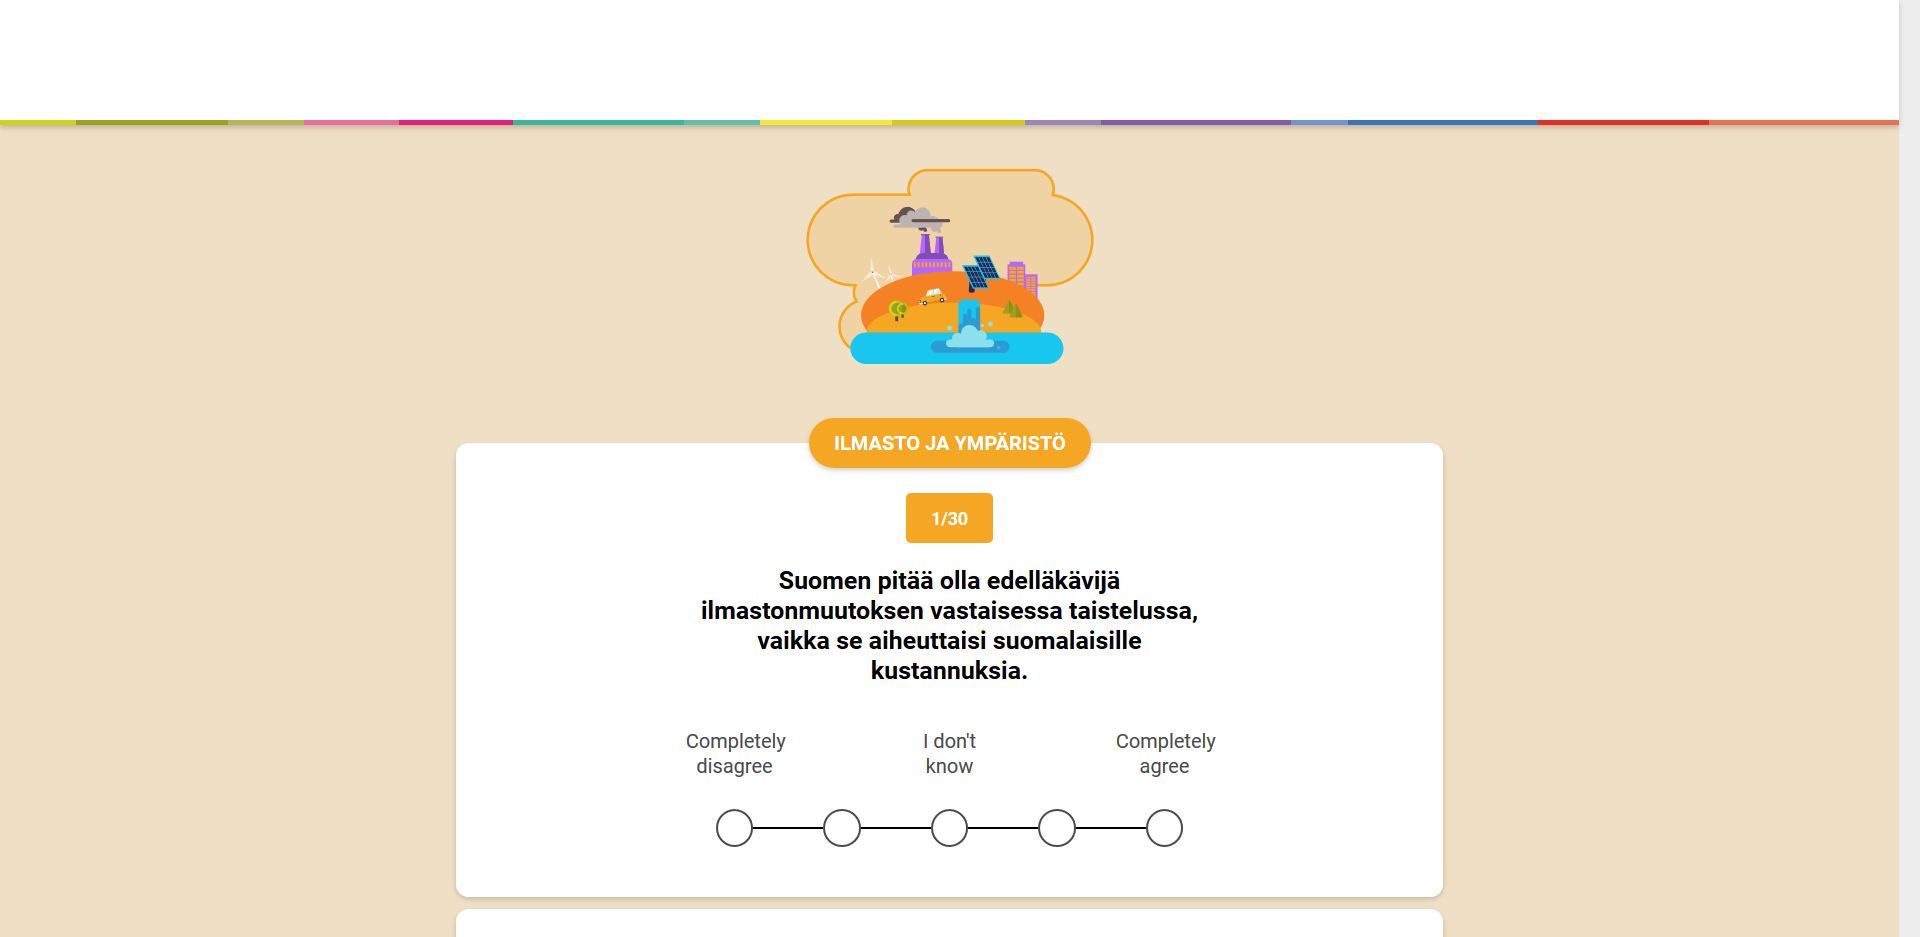

In [ ]:
*** Test Cases ***
Test if all picures are the same size on the form
    #Use predefined keyword to get to the form
    Open webapp in the browser and select municipality
    
    Wait until element is visible   xpath:/html/body/div/main/div[1]/div/article[1]/img
    
    #Get the number of picture found on the form
    ${numOfPictures}=  Get element count   xpath:/html/body/div/main/div[1]/div/article[*]/img
    
    #Get the size of the first picture found
    ${sizeOfFirstPicture}=   Get element size   xpath:/html/body/div/main/div[1]/div/article[1]/img
    
    #Iterating through on the images
    FOR   ${INDEX}   IN RANGE   2   ${numOfPictures}+1
        
        #If the index number is 7 then the number needs to be increased because there is no image for the seventh topic (missing)
        #(no image with xpath:/html/body/div/main/div[1]/div/article[7]/img)
        Run keyword if   ${INDEX}==7   increase index   ${INDEX}
        
        #Get the sizes of the images
        ${currentPictureSize}=   Get element size   xpath:/html/body/div/main/div[1]/div/article[${INDEX}]/img
        Run keyword and continue on failure   Should be equal   ${sizeOfFirstPicture}   ${currentPictureSize}
    END

### Test 8

In [ ]:
*** Test Cases ***
Test if the links in the footer are the same size
    #Using predefined keyword to get to the form
    Open webapp in the browser and select municipality
    
    #Count the elements can be found with the css selector provided - tag.classname - (xpath wasn't working here) 
    ${count}=   Get element count   css:button.dbFmdy
    
    #Get the first webelement to be tested
    ${element}=   Get webelement   xpath:/html/body/div/div/div[1]/button[1]
    
    #Use the first webelement and get the font-size of it
    ${fontsizeOfFirstElement}=   Call method   ${element}   value_of_css_property   font-size
    
    #Remove px from the end of the value
    ${fontsizeOfFirstElement}=   Remove string   ${fontsizeOfFirstElement}   px
    
    #Convert to number
    ${fontsizeOfFirstElement}=   Convert to number   ${fontsizeOfFirstElement}
    
    FOR   ${INDEX}   IN RANGE   2   ${count}+1
        #Get current webelement
        ${current_element}=   Get webelement   xpath:/html/body/div/div/div[1]/button[${INDEX}]
        
        #Get the font-size of current webelement
        ${fontsize}=   Call method   ${current_element}   value_of_css_property   font-size
        
        #Remove px
        ${fontsize}=   Remove string   ${fontsize}   px
        
        #Convert result to number
        ${fontsize}=   Convert to number   ${fontsize}
        
        #Make the comparison
        Run keyword and continue on failure   Should be equal   ${fontsize}   ${fontsizeOfFirstElement}
    END

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

: 

### Test 9

In [24]:
*** Test Cases ***
Check is the percentages for the top seven candidates are in descending order
    #This testcase requires to run the Mandatory test 3 first to get to see the page being tested
    
    #Count how many candidates are displayed on the screen of the results
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/section[*]/div[1]/div[2]
    
    #Create an empty list where the percentage values will be stored
    @{numbers}=   Create list   
    
    #Iterating through on the candidates
    FOR   ${INDEX}   IN RANGE   1   ${count}+1
        #Get percentage of match for current candidate
        ${number}=   Get text   xpath:/html/body/div/main/div[1]/div/section[${INDEX}]/div[1]/div[2]
        
        #Remove the % sign from the end of the value
        ${number}=   Remove string   ${number}   %
        
        #Convert result to number
        ${number}=   Convert to number   ${number}
        Append to list   ${numbers}   ${number}  
    END
    
    #Print out in the log the percentages
    Log   ${numbers}
    
    #Iterating through on the "numbers" list and compare the numbers
    FOR   ${INDEX}   IN RANGE   1   ${count}
        #Print out the index of the previous number
        Log   ${numbers}[${INDEX-1}]
        #Print out the index of the current number
        Log   ${numbers}[${INDEX}]
        
        #Compare the previous number to the current one: the previous should be larger or equal to the current number
        Should be true   ${numbers}[${INDEX-1}] >= ${numbers}[${INDEX}]
    END

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm

### Test 10

In [25]:
*** Test Cases ***
Check if the images for the top seven candidates are equally sized
    #This testcase requires to run the Mandatory test 3 first to get to see the page being tested
    
    #Count how many candidates are there on the result page
    ${count}=   Get element count   xpath:/html/body/div/main/div[1]/div/section[*]/div[1]/div[2]
    
    #Create empty list where the sizes of the images will be stored
    @{sizes}=   Create list
    
    #Iterating through on the candidates
    FOR   ${INDEX}   IN RANGE   1   ${count}+1
        #Check if the "Meet the candidates" text is visible on the page
        Page should contain   Meet the candidate
        
        #Click on the "Meet the candidates" element
        Click element   xpath:/html/body/div/main/div[1]/div/section[${INDEX}]/div[1]/div[1]/a[2]
        
        #Get the size of the image appearing on the page
        ${size}=   Get element size   xpath:/html/body/div/main/div[1]/div/section[1]/img
        
        #Add the size of the current image to the list
        Append to list   ${sizes}   ${size}
        
        #Use button on top of the page to get back to the candidates
        Click element   xpath:/html/body/div/main/div[1]/header/div[1]/button/img
    END
    
    #Print out the resulted list containing the sizes of each image 
    Log   ${sizes}
    
    #Iterating through on each image sizes and get to see if they are matching
    FOR   ${INDEX}   IN RANGE   1   ${count}
        Run keyword and continue on failure   Should be true   ${sizes}[${INDEX-1}]==${sizes}[${INDEX}]
    END

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPg0KPG1ldGEgaHR0cC1lcXVpdj0iUHJhZ21hIiBjb250ZW50PSJuby1jYWNoZSI+DQo8bWV0YSBodHRwLWVxdWl2PSJFeHBpcmVzIiBjb250ZW50PSItMSI+DQo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPg0KPG1ldGEgY29udGVudD0iUm9ib3QgRnJhbWV3b3JrIDMuMS4yIChQeXRob24gMy42LjEwIG9uIHdpbjMyKSIgbmFtZT0iR2VuZXJhdG9yIj4NCjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4NCjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+DQovKiBHZW5lcmljIGFuZCBtaXNjIHN0eWxlcyAqLw0KYm9keSB7DQogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsNCiAgICBmb250LXNpemU6IDAuOGVtOw0KICAgIGNvbG9yOiBibGFjazsNCiAgICBwYWRkaW5nOiA2cHg7DQogICAgYmFja2dyb3VuZDogd2hpdGU7DQp9DQp0YWJsZSB7DQogICAgdGFibGUtbGF5b3V0OiBmaXhlZDsNCiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7DQogICAgZW1wdHktY2VsbHM6IHNob3c7DQogICAgZm9udC1zaXplOiAxZW07DQp9DQp0aCwgdGQgew0KICAgIHZlcnRpY2FsLWFsaWduOiB0b3A7DQp9DQpiciB7DQogICAgbXNvLWRhdGEtcGxhY2VtZW50OiBzYW1lLWNlbGw7IC8qIG1haW50YWluIGxpbmUgYnJlYWtzIGluIEV4Y2VsICovDQp9DQpociB7DQogICAgYmFja2dyb3VuZDogI2NjYzsNCiAgICBoZWlnaHQ6IDFweDsNCiAgICBib3JkZXI6IDA7DQp9DQphLCBhOmxpbmssIGE6dmlzaXRlZCB7DQogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOw0KICAgIGNvbG9yOiAjMTVjOw0KfQ0KYSA+IGltZyB7DQogICAgYm9yZGVyOiAxcHggc29saWQgIzE1YyAhaW1wb3J0YW50Ow0KfQ0KYTpob3ZlciwgYTphY3RpdmUgew0KICAgIHRleHQtZGVjb3JhdGlvbjogdW5kZXJsaW5lOw0KICAgIGNvbG9yOiAjNjFjOw0KfQ0KLnBhcmVudC1uYW1lIHsNCiAgICBmb250LXNpemU6IDAuN2VtOw0KICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOw0KfQ0KLm1lc3NhZ2Ugew0KICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsNCn0NCi8qIEhlYWRlcnMgKi8NCiNoZWFkZXIgew0KICAgIHdpZHRoOiA2NWVtOw0KICAgIGhlaWdodDogM2VtOw0KICAgIG1hcmdpbjogNnB4IDA7DQp9DQpoMSB7DQogICAgZmxvYXQ6IGxlZnQ7DQogICAgbWFyZ2luOiAwIDAgMC41ZW0gMDsNCiAgICB3aWR0aDogNzUlOw0KfQ0KaDIgew0KICAgIGNsZWFyOiBsZWZ0Ow0KfQ0KI2dlbm